In [3]:
import sys
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import torch as pt
sys.path.append("/home/spin_se/Software/flowtorch")
import flowtorch
from flowtorch.data import TAUSurfaceDataloader
from flowtorch import DATASETS

Refer to the installation instructions at https://github.com/FlowModelingControl/flowtorch
If you are not using the TecplotDataloader, ignore this warning.


In [4]:
path_ds = DATASETS["tau_surface_import"]
file_name = "tau_euler.para"
loader = TAUSurfaceDataloader(join(path_ds,file_name))

In [5]:
times = loader.write_times
times

['1.000e+00',
 '2.000e+00',
 '3.000e+00',
 '4.000e+00',
 '5.000e+00',
 '6.000e+00',
 '7.000e+00',
 '8.000e+00',
 '9.000e+00',
 '1.000e+01']

In [6]:
loader.zone_names

['1', '2', '3', '4', '5', '6', '7']

In [7]:
loader.vertices.shape[0]

NameError: name 'vertices' is not defined

In [ ]:
loader.field_names[times[0]]

In [ ]:
cp = loader.load_snapshot("cp", times)

In [ ]:
x = loader.vertices[:,0]
y = loader.vertices[:,1]
z = loader.vertices[:,2]

In [ ]:
cp[:,0].shape

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x,y,c=cp[:,0])
plt.show()

In [8]:
mfile = join(loader._para.path, loader._para.config["primary_grid"])
mdata = Dataset(mfile)
mdata.variables

{'marker': <class 'netCDF4._netCDF4.Variable'>
 int32 marker(no_of_markers)
 unlimited dimensions: 
 current shape = (7,)
 filling on, default _FillValue of -2147483647 used,
 'centaur_key': <class 'netCDF4._netCDF4.Variable'>
 int32 centaur_key(no_of_markers)
 unlimited dimensions: 
 current shape = (7,)
 filling on, default _FillValue of -2147483647 used,
 'points_of_tetraeders': <class 'netCDF4._netCDF4.Variable'>
 int32 points_of_tetraeders(no_of_tetraeders, points_per_tetraeder)
 unlimited dimensions: 
 current shape = (9222, 4)
 filling on, default _FillValue of -2147483647 used,
 'points_of_prisms': <class 'netCDF4._netCDF4.Variable'>
 int32 points_of_prisms(no_of_prisms, points_per_prism)
 unlimited dimensions: 
 current shape = (762, 6)
 filling on, default _FillValue of -2147483647 used,
 'points_of_pyramids': <class 'netCDF4._netCDF4.Variable'>
 int32 points_of_pyramids(no_of_pyramids, points_per_pyramid)
 unlimited dimensions: 
 current shape = (180, 5)
 filling on, default

In [65]:
b_o_s = mdata.variables["boundarymarker_of_surfaces"][:]
p_o_s = mdata.variables["points_of_surfacetriangles"][:]
p_o_q = mdata.variables["points_of_surfacequadrilaterals"][:]
xc  = mdata.variables["points_xc"]
yc  = mdata.variables["points_yc"]
zc  = mdata.variables["points_zc"]
p_o_s

masked_array(
  data=[[  2,  60,  72],
        [ 74,  24,   5],
        [ 73,  75,  74],
        ...,
        [726, 845, 699],
        [764, 710, 709],
        [710, 810, 709]],
  mask=False,
  fill_value=999999,
  dtype=int32)

In [98]:
#indices_of_marker = np.where((b_o_s == 7) | (b_o_s == 1))
indices_of_marker = np.where((b_o_s == 5))
indices_of_marker
mdata.variables["Test"]

KeyError: 'Test'

In [91]:
if len(p_o_q)>0:
    nan_pt = pt.zeros(size=(len(p_o_s),1))
    nan_pt[nan_pt==0] = float('nan')
    # add nan to every triangle as 4th element so we can join the tensors
    filled_p_o_s = pt.cat((pt.tensor(p_o_s, dtype=int), add_pt),1)
    # join the tensors of tris and quads together
    points_of_tris_and_quads = pt.cat((filled_p_o_s, pt.tensor(p_o_q)))
    t = np.unique(points_of_tris_and_quads[indices_of_marker].flatten())
    # Drop nan values again!
    global_id_of_marker_points = t[~np.isnan(t)].astype(int)
else:
    # For Triangles only
    indices_of_marker = np.where(b_o_s == 1)
    global_id_of_marker_points = np.unique(p_o_s[indices_of_marker].flatten())


In [92]:
xs = xc[global_id_of_marker_points]
ys = yc[global_id_of_marker_points]
zs = zc[global_id_of_marker_points]
global_id_of_marker_points

array([  1,   2,   3,   7,  11,  12,  13,  14,  15,  16,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  58,
        60,  61,  62,  63,  64,  65, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146])

In [93]:
sfile = loader._file_name(times[0])
sdata = Dataset(sfile)

In [94]:
gid = sdata.variables["global_id"][:]
cp = sdata.variables["cp"][:]
gid

masked_array(data=[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
                    11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
                    22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
                    33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
                    44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
                    55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
                    66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
                    77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
                    88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
                    99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
                   110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
                   121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
                   132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
                   143, 144, 145, 146,

In [95]:
indices = np.where(np.in1d(gid, global_id_of_marker_points))[0]
indices

array([  1,   2,   3,   7,  11,  12,  13,  14,  15,  16,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  58,
        60,  61,  62,  63,  64,  65, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146])

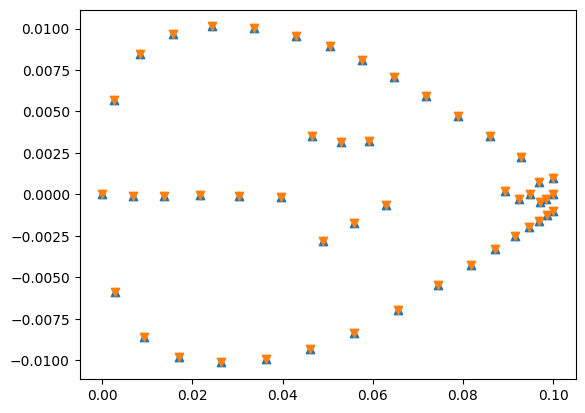

In [97]:
cp = sdata.variables["cp"][:][np.where(np.in1d(gid,global_id_of_marker_points))[0]]
xtest = sdata.variables["x"][:][np.where(np.in1d(gid,global_id_of_marker_points))[0]]
ytest = sdata.variables["y"][:][np.where(np.in1d(gid,global_id_of_marker_points))[0]]
ztest = sdata.variables["z"][:][np.where(np.in1d(gid,global_id_of_marker_points))[0]]
fig, ax = plt.subplots()
ax.scatter(xs,zs, marker='^')
ax.scatter(xtest,ztest, marker='v')
plt.show()